Importiamo le librerie e il dataset MNIST

In [1]:
#from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from random import randint
import numpy as np
import time
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [3]:
tf.reset_default_graph()
# Parameters
# START PARAMETRI DA MODIFICARE 
learning_rate = 0.1
training_iters = 1000
# END PARAMETRI DA MODIFICARE
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input], name="placeholder_x")
y = tf.placeholder(tf.float32, [None, n_classes], name="placeholder_y")
keep_prob = tf.placeholder(tf.float32, name="placeholder_dropout") #dropout (keep probability)
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
argmax = tf.argmax(pred, 1) 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [4]:
start = time.time()
# Launch the graph
sess = tf.Session()
sess.run(init)
step = 1
# Keep training until reach max iterations
while step * batch_size < training_iters:
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop)
    sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                   keep_prob: dropout})
    if step % display_step == 0:
        # Calculate batch loss and accuracy
        loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                          y: batch_y,
                                                          keep_prob: 1.})
        print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
              "{:.6f}".format(loss) + ", Training Accuracy= " + \
              "{:.5f}".format(acc)
    step += 1
print "Optimization Finished!"

# Calculate accuracy for 128 mnist test images
print "Testing Accuracy:", \
    sess.run(accuracy, feed_dict={x: mnist.test.images[:512],
                                  y: mnist.test.labels[:512],
                                  keep_prob: 1.})
print "Time elapsed: "+ str( time.time()-start)

Optimization Finished!
Testing Accuracy: 0.154297
Time elapsed: 5.73013901711


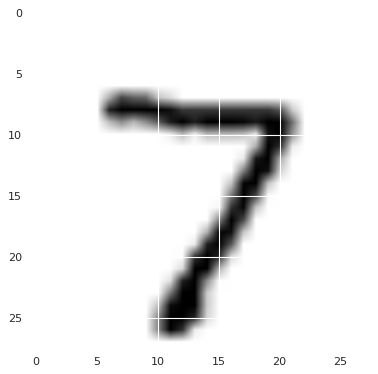

Number predicted is :  [7]


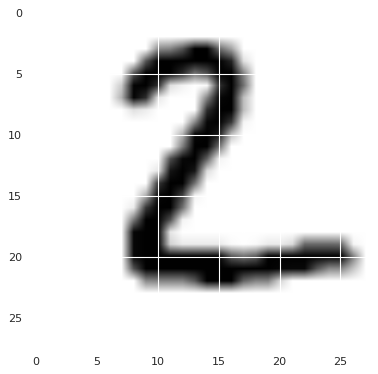

Number predicted is :  [2]


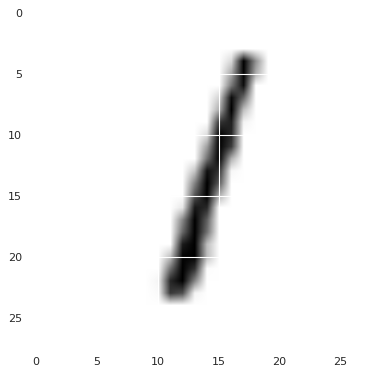

Number predicted is :  [7]


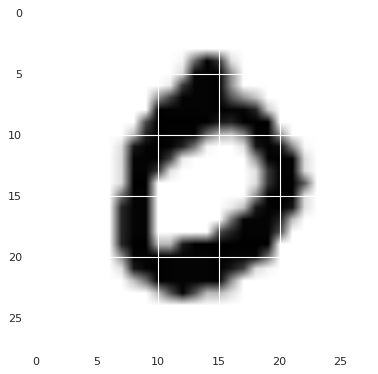

Number predicted is :  [4]


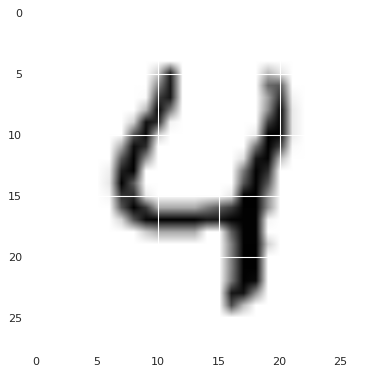

Number predicted is :  [7]


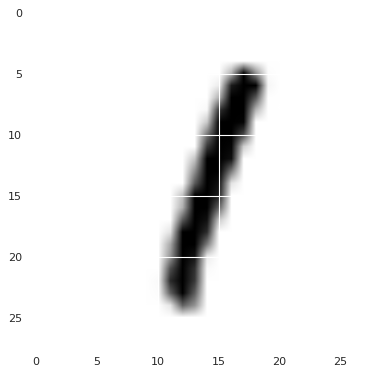

Number predicted is :  [7]


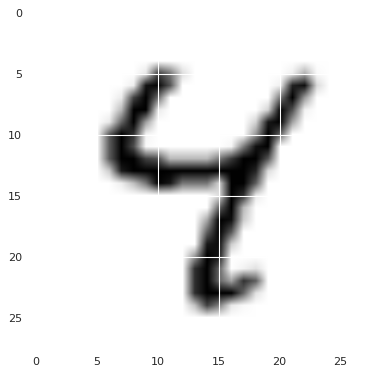

Number predicted is :  [7]


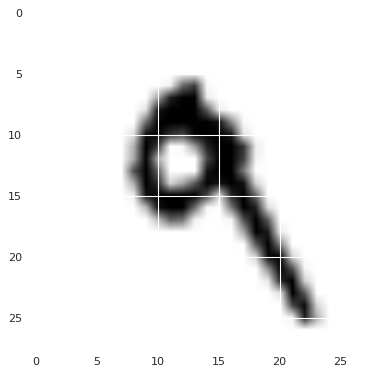

Number predicted is :  [3]


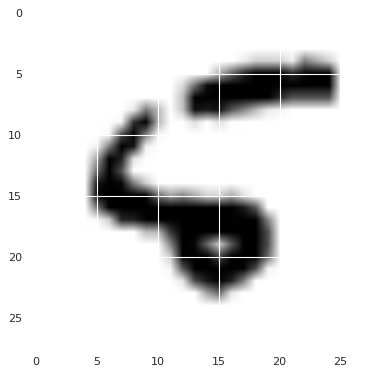

Number predicted is :  [7]


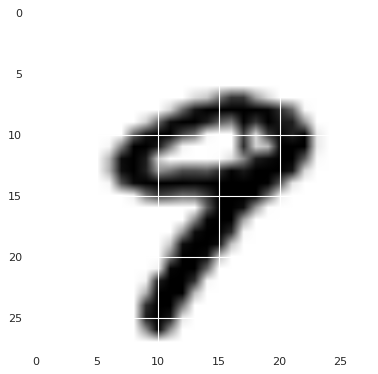

Number predicted is :  [7]


In [5]:
for i in range(0,10):
  
  img = mnist.test.images[i]
  classification = sess.run(argmax, feed_dict={x: [img],keep_prob: 1.})

  plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
  plt.show()
  print 'Number predicted is : ', classification
   